In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
LC_df = pd.read_csv("Data/LC_HDI.csv")
LC_df.drop("Unnamed: 0" , axis=1, inplace=True)

> ### Drop unnecessary columns, reorder remaining columns, rename remaining columns 

In [3]:
LC_df_clean = LC_df.copy()
LC_df_clean.drop(["measure","age","cause","metric","upper","lower"],axis=1,inplace=True)
LC_df_clean = LC_df_clean[["location","region", "super_region","year", "val","HDI","sex"]]
LC_df_clean.rename(index=str,columns={"val" : "MR"}, inplace=True)

In [4]:
LC_df_clean

,location,region,super_region,year,MR,HDI,sex
0,Afghanistan,5,2,1990,31.086848,0.295,Male
1,Afghanistan,5,2,1990,11.711023,0.295,Female
2,Afghanistan,5,2,1990,21.094622,0.295,Both
3,Afghanistan,5,2,1991,31.152613,0.300,Male
4,Afghanistan,5,2,1991,11.667114,0.300,Female
5,Afghanistan,5,2,1991,21.130373,0.300,Both
6,Afghanistan,5,2,1992,31.252548,0.309,Male
7,Afghanistan,5,2,1992,11.625994,0.309,Female
8,Afghanistan,5,2,1992,21.194493,0.309,Both
9,Afghanistan,5,2,1993,31.443529,0.305,Male


> ### Associate name and number of each Region/Super_Region

In [5]:
super_regions_dict = {1:"Sub-Saharan Africa",
                2:"North Africa and Middle East",
                3:"South Asia",
                4:"Southeast Asia, East Asia, and Oceania",
                5:"Latin America and Caribbean",
                6:"Central Europe, Eastern Europe, and Central Asia",
                7: "High-income" }


regions_dict = {1: "Eastern Sub-Saharan Africa",
           2: "Western Sub-Saharan Africa",
           3: "Southern Sub-Saharan Africa",
           4:  "Central Sub-Saharan Africa" , 
           5: "North Africa and Middle East",
           6: "South Asia",
           7: "Southeast Asia",
           8: "East Asia",
           9: "Oceania",
           10: "Central Latin America",
           11: "Andean Latin America",
           12: "Caribbean",
           13: "Tropical Latin America",
           14: "Eastern Europe",
           15: "Central Europe",
           16: "Central Asia",
           17: "Southern Latin America",
           18: "Western Europe",
           19: "High-income Asia Pacific",
           20: "Australasia",
           21: "High-income North America"}


    
sr_to_r_dict = {1: "1 , 2 , 3, 4", 
                2: "5 ", 
                3: "6 ", 
                4: "7 , 8 , 9 ",
                5: "10 , 11 , 12 ,13",
                6: "14, 15, 16",
                7: "17 , 18, 19,20,21"}


In [6]:
LC_df_clean['region'] = LC_df_clean['region'].map(regions_dict)
LC_df_clean['super_region'] = LC_df_clean['super_region'].map(super_regions_dict)


> ### Create a separate datafram for each gender as well as one for total(both)

In [7]:
LC_df_both = LC_df_clean[LC_df_clean.sex == "Both"]
LC_df_female = LC_df_clean[LC_df_clean.sex == "Female"]
LC_df_male = LC_df_clean[LC_df_clean.sex == "Male"]

> ### Descriptive Statistics for all three datasets

In [8]:
DS_df_both = LC_df_both.groupby(['super_region','year']).mean()
df=DS_df_both.reset_index()
both=df.pivot(index='super_region', columns='year', values='MR')

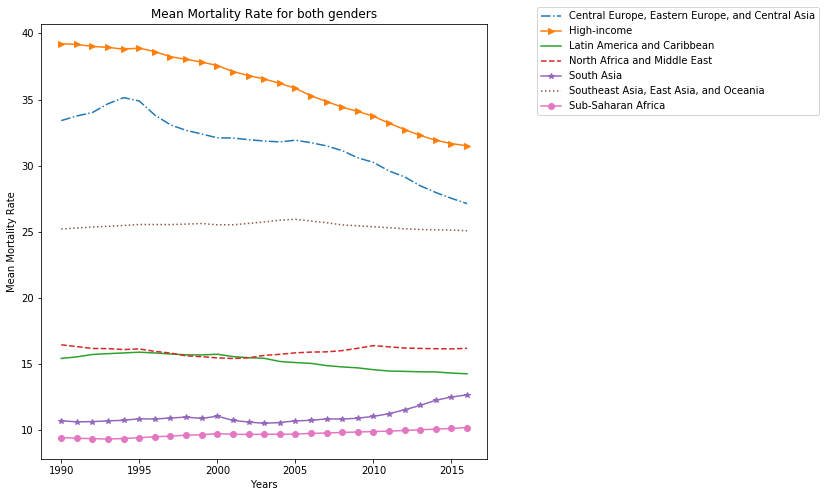

In [9]:
line_s = ['-.','>-',  '-', '--','*-' , ':', 'o-']
plt.figure(figsize=(8,8)) 
for sr in range(both.index.size ):
    x = [both.columns[i] for i in range(both.columns.size)]
    y = [both.values[sr,i]for i in range(both.columns.size)]
    #[filtered_super_region_stat_df.iloc[sr,[i][0]] for i in [0,2,4,6,8,10]]
    plt.plot(x, y, line_s[sr], label=both.index[sr])

       
plt.xlabel('Years')
plt.ylabel('Mean Mortality Rate')

plt.title("Mean Mortality Rate for both genders")

plt.legend(bbox_to_anchor=(1.1, 1.05))

plt.show()

In [10]:
DS_df_female = LC_df_female.groupby(['super_region','year']).mean()
Fdf=DS_df_female.reset_index()
female=Fdf.pivot(index='super_region', columns='year', values='MR')

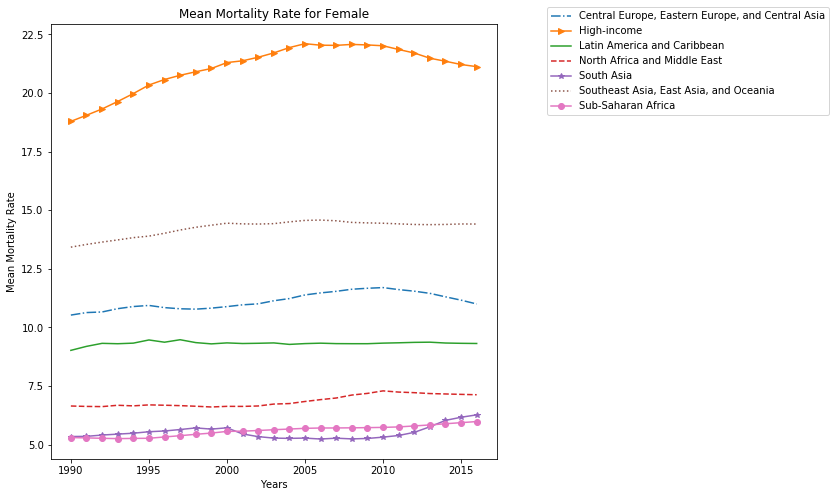

In [11]:
line_s = ['-.','>-',  '-', '--','*-' , ':', 'o-']
plt.figure(figsize=(8,8)) 
for sr in range(female.index.size ):
    x = [female.columns[i] for i in range(female.columns.size)]
    y = [female.values[sr,i]for i in range(female.columns.size)]
    #[filtered_super_region_stat_df.iloc[sr,[i][0]] for i in [0,2,4,6,8,10]]
    plt.plot(x, y, line_s[sr], label=female.index[sr])

       
plt.xlabel('Years')
plt.ylabel('Mean Mortality Rate')

plt.title("Mean Mortality Rate for Female")

plt.legend(bbox_to_anchor=(1.1, 1.05))

plt.show()

In [12]:
DS_df_male = LC_df_male.groupby(['super_region','year']).mean()
Mdf=DS_df_male.reset_index()
male=Mdf.pivot(index='super_region', columns='year', values='MR')

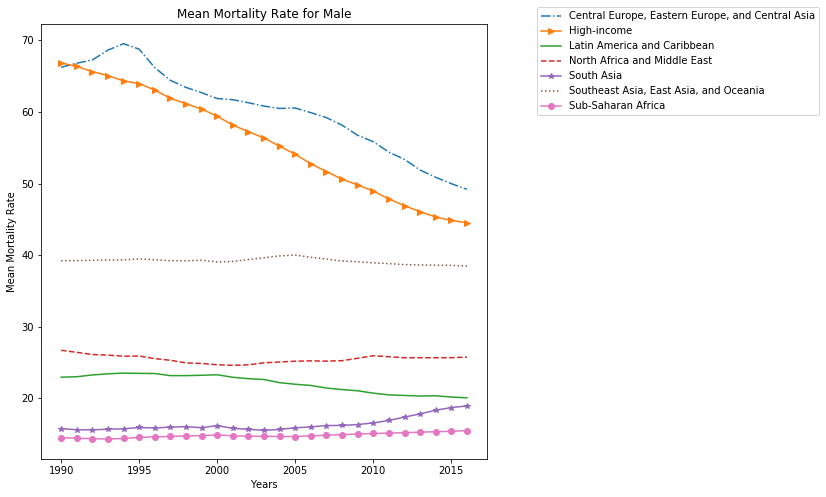

In [13]:
line_s = ['-.','>-',  '-', '--','*-' , ':', 'o-']
plt.figure(figsize=(8,8)) 
for sr in range(male.index.size ):
    x = [male.columns[i] for i in range(male.columns.size)]
    y = [male.values[sr,i]for i in range(male.columns.size)]
    #[filtered_super_region_stat_df.iloc[sr,[i][0]] for i in [0,2,4,6,8,10]]
    plt.plot(x, y, line_s[sr], label=male.index[sr])

       
plt.xlabel('Years')
plt.ylabel('Mean Mortality Rate')

plt.title("Mean Mortality Rate for Male")

plt.legend(bbox_to_anchor=(1.1, 1.05))

plt.show()

# Random Model effect

In [14]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

/Users/yasaman/anaconda/envs/py36/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


> ## Fit GEE to Long-form

> ### Both

In [15]:
for i in sorted(LC_df_both.super_region.unique()):
    print(i)
    print(LC_df_both[LC_df_both.super_region==i].size)
    df_super_region = LC_df_both[LC_df_both.super_region == i]
    GEE_md_mula = smf.GEE.from_formula("MR ~ year + HDI", data=df_super_region, groups=df_super_region["location"])
    GEE_mdf_mula = GEE_md_mula.fit()
    print(GEE_mdf_mula.summary())

Central Europe, Eastern Europe, and Central Asia
5481
                               GEE Regression Results                              
Dep. Variable:                          MR   No. Observations:                   32
Model:                                 GEE   No. clusters:                        2
Method:                        Generalized   Min. cluster size:                   6
                      Estimating Equations   Max. cluster size:                  26
Family:                           Gaussian   Mean cluster size:                16.0
Dependence structure:         Independence   Num. iterations:                     2
Date:                     Thu, 12 Jul 2018   Scale:                           2.984
Covariance type:                    robust   Time:                         13:59:55
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -604.1191    145.646

ValueError: zero-size array to reduction operation maximum which has no identity

In [16]:
print("\n Total:")
GEE_md_mula_total = smf.GEE.from_formula("MR ~ year + HDI", data=LC_df_both, groups=LC_df_both["location"])
GEE_mdf_mula_total = GEE_md_mula_total.fit()
print(GEE_mdf_mula_total.summary())


 Total:
                               GEE Regression Results                              
Dep. Variable:                          MR   No. Observations:                  144
Model:                                 GEE   No. clusters:                        8
Method:                        Generalized   Min. cluster size:                   6
                      Estimating Equations   Max. cluster size:                  26
Family:                           Gaussian   Mean cluster size:                18.0
Dependence structure:         Independence   Num. iterations:                     2
Date:                     Thu, 12 Jul 2018   Scale:                          64.754
Covariance type:                    robust   Time:                         14:00:04
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    864.2526    352.518      2.452      0.014     173.329    1555.17

> ### Female

In [17]:
for i in sorted(LC_df_female.super_region.unique()):
    print(i)
    print(LC_df_female[LC_df_female.super_region==i].size)
    df_super_region = LC_df_female[LC_df_female.super_region == i]
    GEE_md_mula = smf.GEE.from_formula("MR ~ year + HDI", data=df_super_region, groups=df_super_region["location"])
    GEE_mdf_mula = GEE_md_mula.fit()
    print(GEE_mdf_mula.summary())

Central Europe, Eastern Europe, and Central Asia
5481
                               GEE Regression Results                              
Dep. Variable:                          MR   No. Observations:                   32
Model:                                 GEE   No. clusters:                        2
Method:                        Generalized   Min. cluster size:                   6
                      Estimating Equations   Max. cluster size:                  26
Family:                           Gaussian   Mean cluster size:                16.0
Dependence structure:         Independence   Num. iterations:                     2
Date:                     Thu, 12 Jul 2018   Scale:                           1.934
Covariance type:                    robust   Time:                         14:00:08
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -211.8382    206.155

ValueError: zero-size array to reduction operation maximum which has no identity

In [18]:
print("\n Total:")
GEE_md_mula_total = smf.GEE.from_formula("MR ~ year + HDI", data=LC_df_female, groups=LC_df_female["location"])
GEE_mdf_mula_total = GEE_md_mula_total.fit()
print(GEE_mdf_mula_total.summary())


 Total:
                               GEE Regression Results                              
Dep. Variable:                          MR   No. Observations:                  144
Model:                                 GEE   No. clusters:                        8
Method:                        Generalized   Min. cluster size:                   6
                      Estimating Equations   Max. cluster size:                  26
Family:                           Gaussian   Mean cluster size:                18.0
Dependence structure:         Independence   Num. iterations:                     2
Date:                     Thu, 12 Jul 2018   Scale:                          11.682
Covariance type:                    robust   Time:                         14:00:11
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -36.6055    101.861     -0.359      0.719    -236.249     163.03

> ### Male

In [19]:
for i in sorted(LC_df_male.super_region.unique()):
    print(i)
    print(LC_df_male[LC_df_male.super_region==i].size)
    df_super_region = LC_df_male[LC_df_male.super_region == i]
    GEE_md_mula = smf.GEE.from_formula("MR ~ year + HDI", data=df_super_region, groups=df_super_region["location"])
    GEE_mdf_mula = GEE_md_mula.fit()
    print(GEE_mdf_mula.summary())

Central Europe, Eastern Europe, and Central Asia
5481
                               GEE Regression Results                              
Dep. Variable:                          MR   No. Observations:                   32
Model:                                 GEE   No. clusters:                        2
Method:                        Generalized   Min. cluster size:                   6
                      Estimating Equations   Max. cluster size:                  26
Family:                           Gaussian   Mean cluster size:                16.0
Dependence structure:         Independence   Num. iterations:                     2
Date:                     Thu, 12 Jul 2018   Scale:                          22.888
Covariance type:                    robust   Time:                         14:00:14
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1047.7890    237.638

ValueError: zero-size array to reduction operation maximum which has no identity

In [20]:
print("\n Total:")
GEE_md_mula_total = smf.GEE.from_formula("MR ~ year + HDI", data=LC_df_male, groups=LC_df_male["location"])
GEE_mdf_mula_total = GEE_md_mula_total.fit()
print(GEE_mdf_mula_total.summary())


 Total:
                               GEE Regression Results                              
Dep. Variable:                          MR   No. Observations:                  144
Model:                                 GEE   No. clusters:                        8
Method:                        Generalized   Min. cluster size:                   6
                      Estimating Equations   Max. cluster size:                  26
Family:                           Gaussian   Mean cluster size:                18.0
Dependence structure:         Independence   Num. iterations:                     2
Date:                     Thu, 12 Jul 2018   Scale:                         194.823
Covariance type:                    robust   Time:                         14:00:18
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2018.6764    693.259      2.912      0.004     659.913    3377.44